In [105]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import matplotlib as mpl

In [106]:
df = pd.read_csv('wage-data-coast.csv')

In [107]:
df.head()

,Year,State,Salary,IsCoastal
0,1968,Alabama,0.00000,0
1,1968,Alaska,2.10000,1
2,1968,Arizona,0.66000,0
3,1968,Arkansas,0.15625,0
4,1968,California,1.65000,1


In [108]:
data = df[df['State'].eq('Arizona') & df['Year'].le(2000)]


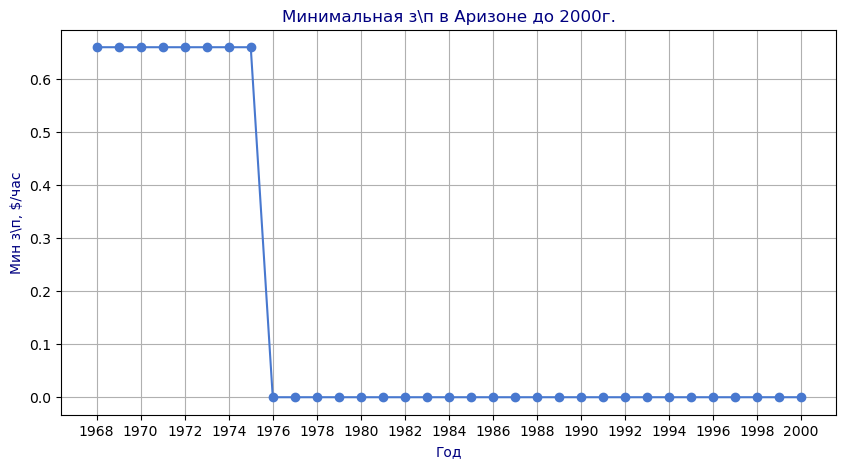

In [109]:

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(data['Year'], data['Salary'], 'o-')
ax.set_title('Минимальная з\п в Аризоне до 2000г.',color='navy')
ax.set_xlabel('Год', color='navy')
ax.set_ylabel('Мин з\п, $/час', color='navy')
ax.set_xticks(list(range(data.Year.min(), data.Year.max(), 2)) + [data.Year.max()])
ax.grid(True)
plt.show()

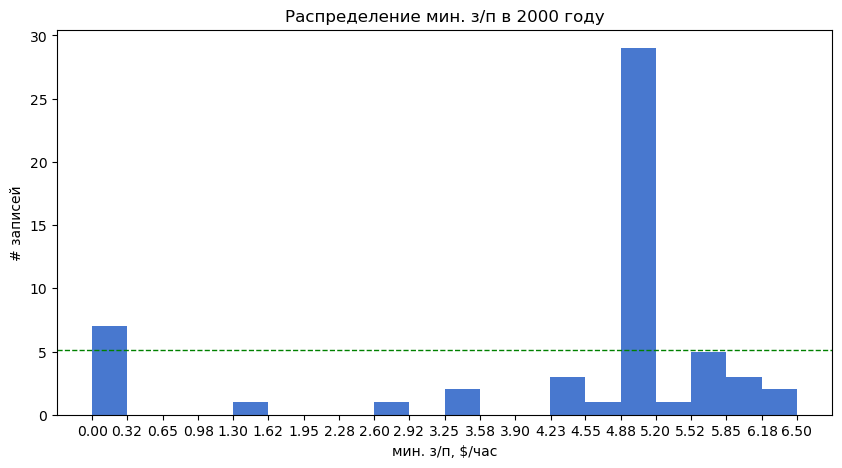

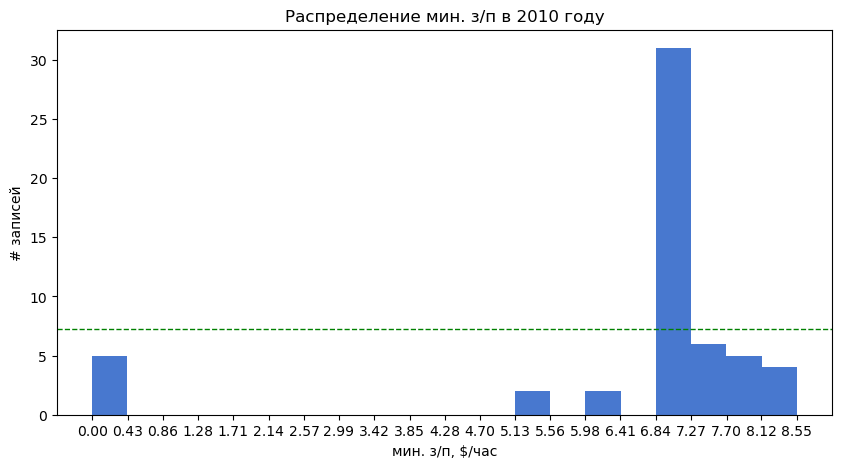

In [110]:
for year in [2000, 2010]:
    data = df[df.Year.eq(year)]['Salary']

    fig, ax = plt.subplots(figsize=(10,5))

    _, x_bins, _ = ax.hist(data, label=str(year), bins=20)
    ax.axhline(data.median(), linewidth=1, linestyle='--', color='green')

    ax.set_title(f'Распределение мин. з/п в {year} году')
    ax.set_xlabel('мин. з/п, $/час')
    ax.set_ylabel('# записей')
    ax.set_xticks(np.round(x_bins, 2))

plt.show()



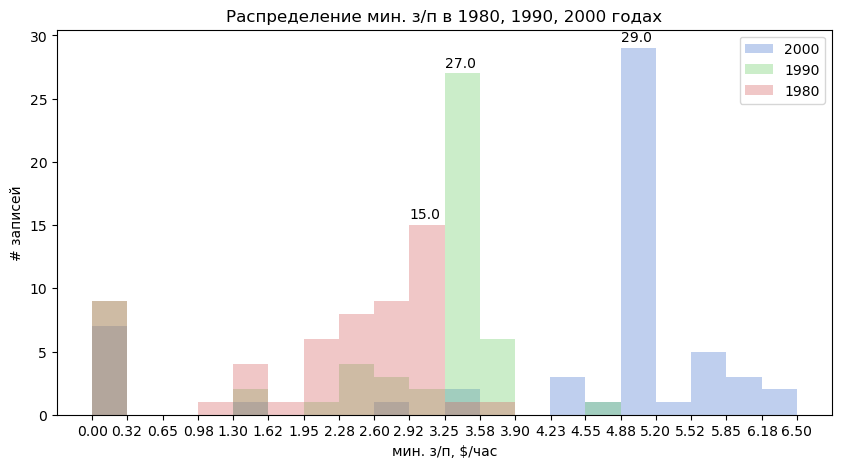

In [111]:
fig, ax = plt.subplots(figsize=(10,5))
x_bins = None
bins_count = 20

# упорядочиваем года по убыванию таким образом, 
# что бы первым для рисования графика был год, 
# у которого наибольшее значение ширины столбца.
# Далее эта ширина будет использоваться по оси Х.
# ш. 1. формирование списка кортежей из ширины и года, 
# отсортированных по убыванию ширины 
# ш. 2. выборка только года из ш.1 
years = sorted(
    [(df[df.Year.eq(year)]['Salary'].max()/bins_count, year) for year in [1980, 1990, 2000]], 
    key = lambda x: -x[0]
    )
years = [x[1] for x in years]

for year in years:
    data = df[df.Year.eq(year)]['Salary']
    clr = next(ax._get_patches_for_fill.prop_cycler)['color']
    n, x_bins, _ = ax.hist(data, label=str(year), bins=x_bins if x_bins is not None else bins_count, alpha=0.35, color=clr)
    ax.text(x_bins[n.argmax()], n.max() + 0.5, n.max())
    # ax.axhline(np.mean(n), label=f'median {year}', linewidth=1, linestyle=':', color=clr)
    # ax.axhline(np.max(n), linewidth=1, linestyle='--', color=clr)
    # ax.axvline(data.median(), label=f'median {year}', linewidth=1, linestyle=':', color=clr)


ax.set_title(f'Распределение мин. з/п в {", ".join(map(str,sorted(years)))} годaх')
ax.set_xlabel('мин. з/п, $/час')
ax.set_ylabel('# записей')
ax.set_xticks(np.round(x_bins, 2))
ax.legend()

plt.show()

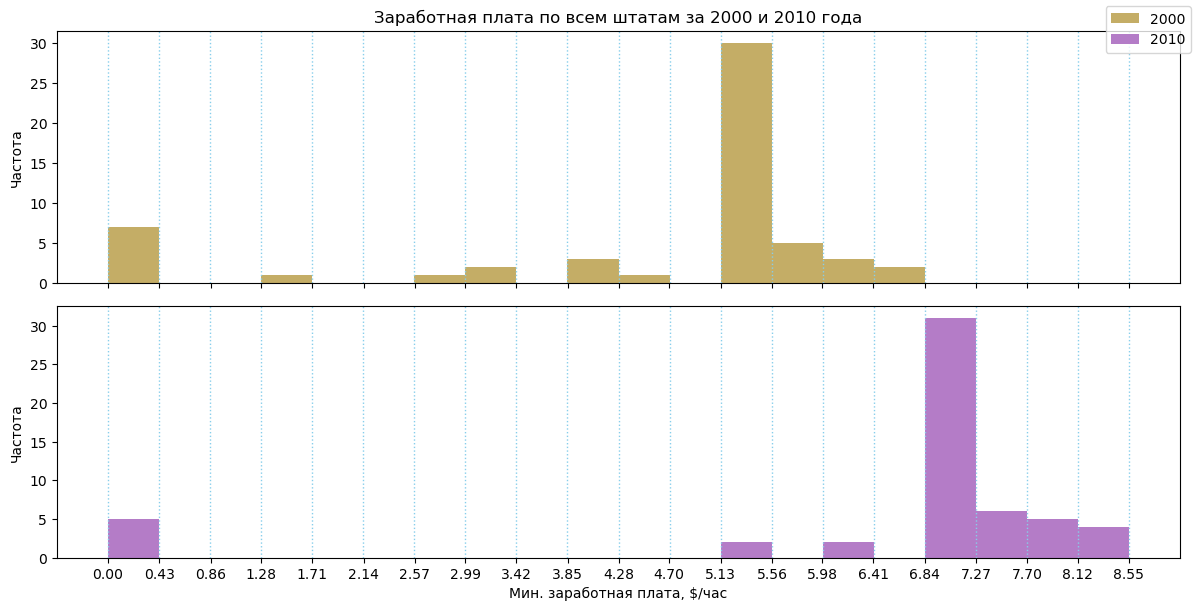

In [112]:
fig, axs = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=False, figsize=(12, 6))

data1 = df[df['Year'].eq(2000)]['Salary']
data2 = df[df['Year'].eq(2010)]['Salary']
_, bins, _ = axs[1].hist(data2, bins=20, label='2010', color=next(ax._get_patches_for_fill.prop_cycler)['color'])
axs[0].hist(data1, bins=bins, label='2000', color=next(ax._get_patches_for_fill.prop_cycler)['color'])

for ax in axs:
    ax.set_xticks(np.round(bins,2)) 
    for bin_ in bins:
        ax.axvline(bin_, linewidth=1, linestyle=':', color='skyblue')

axs[0].set_ylabel('Частота')
axs[1].set_ylabel('Частота')
axs[1].set_xlabel('Мин. заработная плата, $/час')
fig.tight_layout()
axs[0].set_title('Заработная плата по всем штатам за 2000 и 2010 года')
fig.legend()
plt.show()

In [113]:
df.head()

,Year,State,Salary,IsCoastal
0,1968,Alabama,0.00000,0
1,1968,Alaska,2.10000,1
2,1968,Arizona,0.66000,0
3,1968,Arkansas,0.15625,0
4,1968,California,1.65000,1


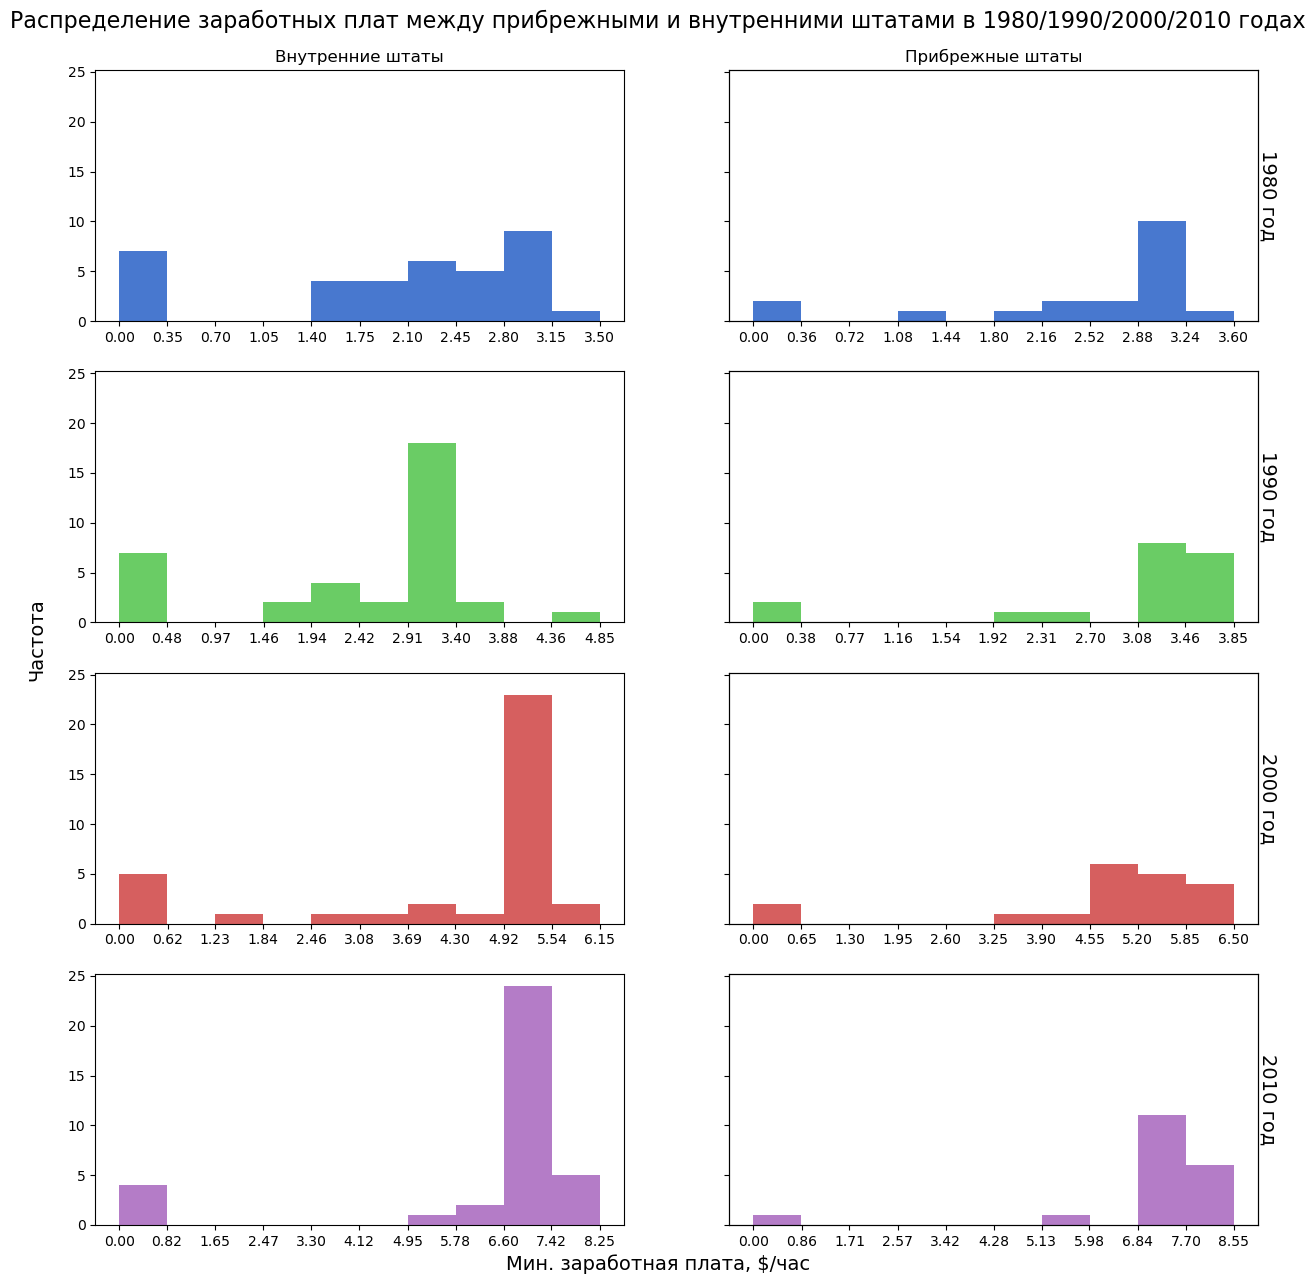

In [114]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(15, 15), sharey=True)

years = [1980, 1990, 2000, 2010]
is_coastal = [0, 1]

for i, year in enumerate(years):
    clr = next(axs[0][0]._get_patches_for_fill.prop_cycler)['color']
    for y, coastal in enumerate(is_coastal):
        data = df[df['Year'].eq(year) & df['IsCoastal'].eq(coastal)]['Salary']
        ax = axs[i][y]
        _, bins, _ = ax.hist(data, color = clr)
        # ax.set_title(f'Распределение з/п в {year} году')
        if i == 0:
            if y==0:
                ax.set_title('Внутренние штаты')
            else:
                ax.set_title('Прибрежные штаты')
        
        if y == 1:
            ax2 = ax.twinx()
            ax2.set_ylabel(f'{year} год',labelpad=14, rotation=-90, fontsize=14)
            ax2.set_yticks([])
        ax.set_xticks(bins.round(2))

fig.suptitle(f'Распределение заработных плат между прибрежными и внутренними штатами в {"/".join(map(str,years))} годах\n', 
    fontsize=16, y=0.92)
fig.text(0.08, 0.5, 'Частота', va='center', rotation='vertical', fontsize=14)
fig.text(0.5, 0.08, 'Мин. заработная плата, $/час', ha='center', fontsize=14)
# fig.tight_layout()
plt.show()


In [115]:
a = df[df['State'].isin(states)]['Year'].unique()
amin, amax = a[::len(a)-1]
list(range(amin - amin%5, amax - amax%5 + 6, 5)) + [amin, amax]

[1965,
 1970,
 1975,
 1980,
 1985,
 1990,
 1995,
 2000,
 2005,
 2010,
 2015,
 2020,
 1968,
 2017]

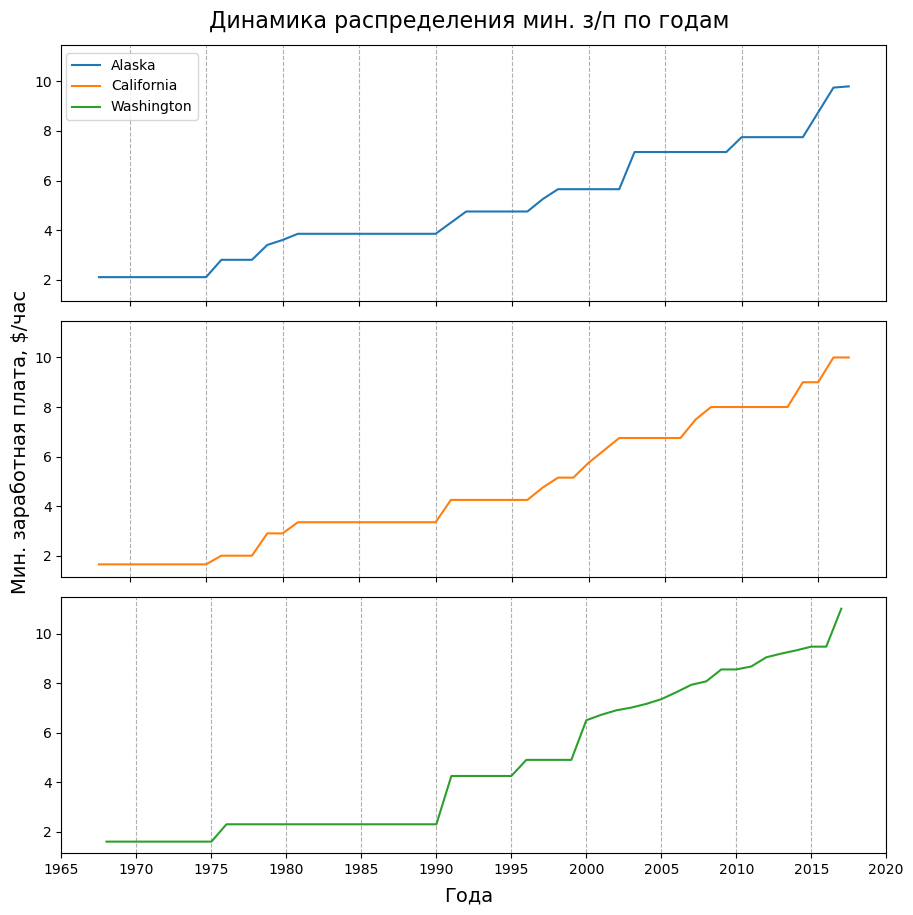

In [119]:
# plt.style.use('seaborn-colorblind')

# mpl.rcParams.update(plt.style.core.load_base_library()['seaborn-paper'])
plt.style.use('default')

fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(9,9), sharex=True, sharey=True)

states = ['Alaska', 'California', 'Washington']
years = df[df['State'].isin(states)]['Year'].unique()
year_min, year_max = years[::len(years)-1]
x_range = list(range(year_min - year_min%5, year_max - year_max%5 + 6, 5))
# x_range += [year_min, year_max]
# x_range.sort()

for i, state in enumerate(states):
    data = df[df['State'].eq(state)]
    ax = axs[i]
    clr = next(axs[0]._get_patches_for_fill.prop_cycler)['color']
    ax.plot(data['Year'], data['Salary'], label=state, color=clr)
    if i == len(states)-1:
        ax.set_xticks(x_range)
    ax.grid(True, axis='x', linestyle='--')

fig.suptitle('Динамика распределения мин. з/п по годам', fontsize=16)
fig.legend(states, loc='upper left', bbox_to_anchor=(0.045, 0., 0.5, 0.94))
fig.text(-0.01, 0.5, 'Мин. заработная плата, $/час', va='center', rotation='vertical', fontsize=14)
fig.text(0.5, -0.01, 'Года', ha='center', fontsize=14)
fig.tight_layout()
plt.show()


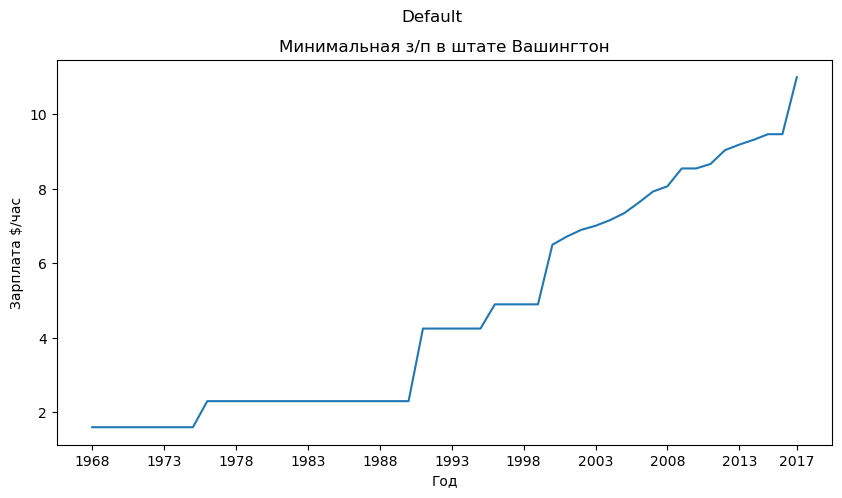

In [132]:
data = df[df['State'].eq('Washington')][['Year','Salary']]


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))

fig.suptitle('Default')
ax.plot(data['Year'], data['Salary'])

ax.set_title('Минимальная з/п в штате Вашингтон')
ax.set_ylabel('Зарплата $/час')
ax.set_xlabel('Год')
ax.set_xticks(list(range(data['Year'].min(), data['Year'].max(), 5)) + [data['Year'].max()])
plt.show()

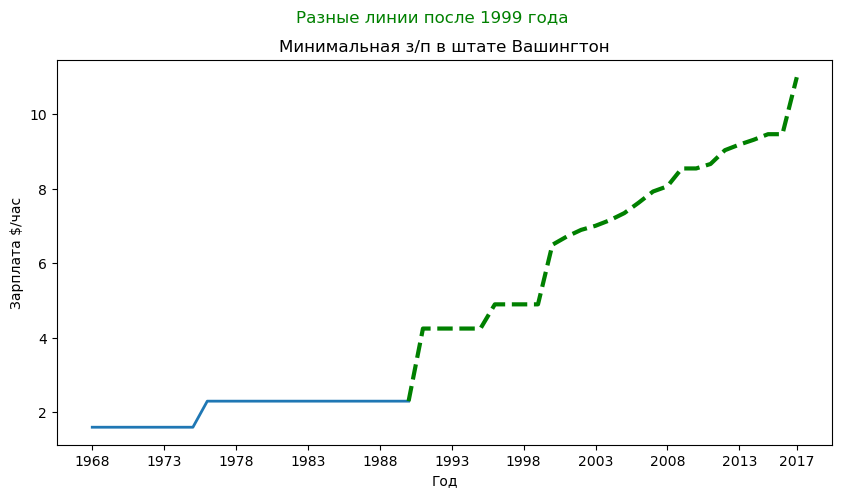

In [144]:
data = df[df['State'].eq('Washington')][['Year','Salary']]

dt1 = data[data['Year'] <= 1990 ]
dt2 = data[data['Year'] >= 1990 ]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))

fig.suptitle('Разные линии после 1999 года', color='green')
ax.plot(dt1['Year'], dt1['Salary'], linewidth=2)
ax.plot(dt2['Year'], dt2['Salary'], linewidth=3, color='green', linestyle='--')

ax.set_title('Минимальная з/п в штате Вашингтон')
ax.set_ylabel('Зарплата $/час')
ax.set_xlabel('Год')
ax.set_xticks(list(range(data['Year'].min(), data['Year'].max(), 5)) + [data['Year'].max()])
plt.show()

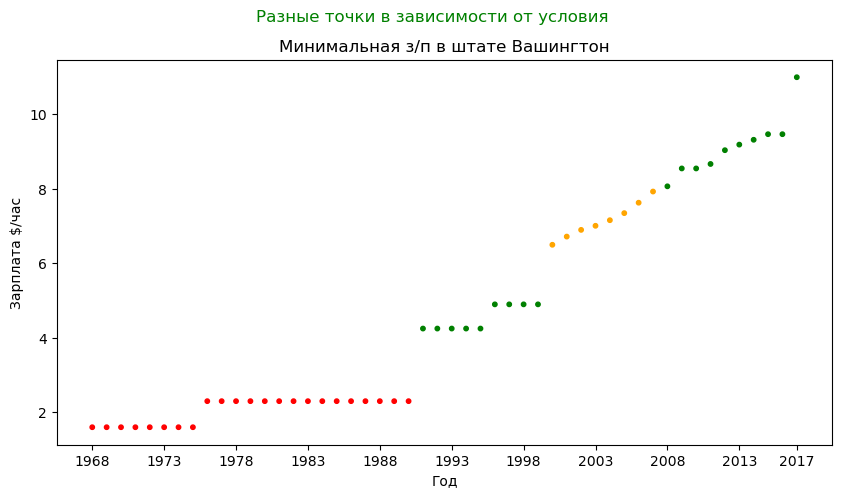

In [148]:
data = df[df['State'].eq('Washington')][['Year','Salary']]

data['color'] = 'green'
data.loc[data['Salary'] < 4, 'color'] = 'red'
data.loc[(data['Salary'] > 6) & (data['Salary'] < 8), 'color'] = 'orange'


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))

fig.suptitle('Разные точки в зависимости от условия', color='green')
ax.scatter(data['Year'], data['Salary'], color=data['color'], s=10)

ax.set_title('Минимальная з/п в штате Вашингтон')
ax.set_ylabel('Зарплата $/час')
ax.set_xlabel('Год')
ax.set_xticks(list(range(data['Year'].min(), data['Year'].max(), 5)) + [data['Year'].max()])
plt.show()

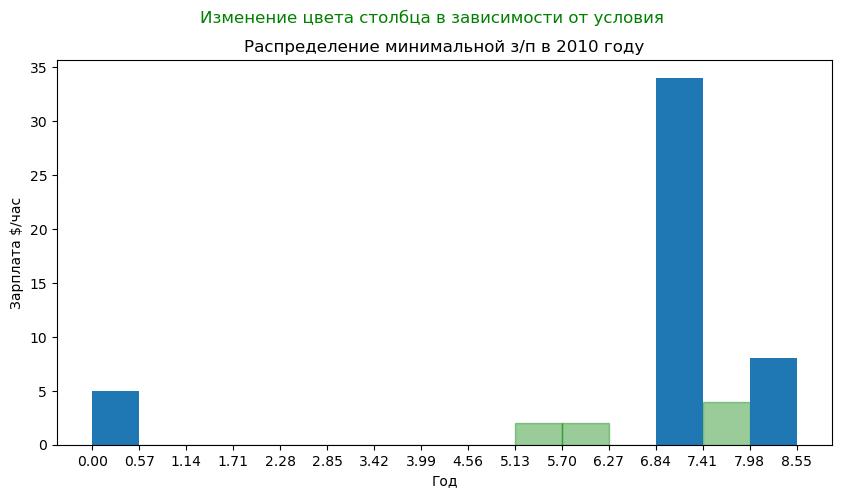

In [210]:
year = 2010
data = df[df['Year'].eq(year)][['Year','Salary']]


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))

fig.suptitle('Изменение цвета столбца в зависимости от условия', color='green')

n, bins, patches = ax.hist(data['Salary'], bins=15)

for i in [x[0] for x in np.argwhere(n <= np.median(n[n > 0]))]:
    patches[i].set_color('green')
    patches[i].set_alpha(.4)

ax.set_title('Распределение минимальной з/п в {} году'.format(year))
ax.set_ylabel('Зарплата $/час')
ax.set_xlabel('Год')
ax.set_xticks(bins)
plt.show()

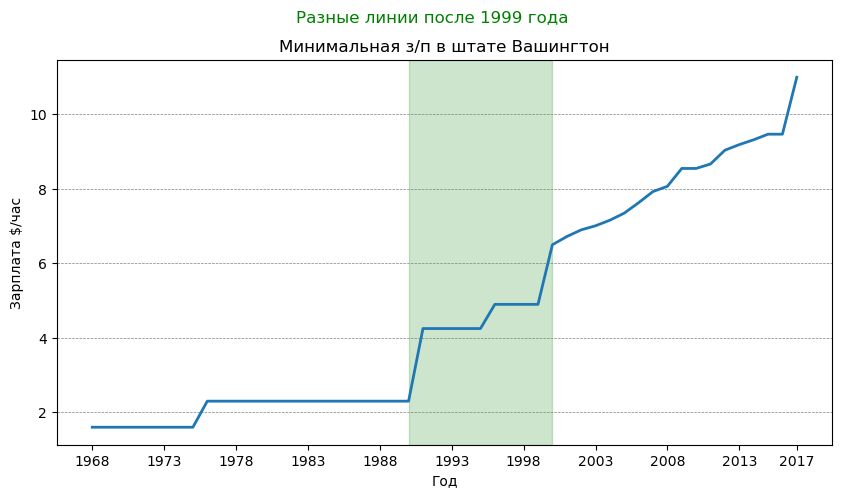

In [225]:
data = df[df['State'].eq('Washington')][['Year','Salary']]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))

fig.suptitle('Разные линии после 1999 года', color='green')
ax.plot(data['Year'], data['Salary'], linewidth=2)
ax.axvspan(xmin=1990, xmax=2000, color='green', alpha=.2, )
ax.grid(True, axis='y', linestyle='--', color='grey', linewidth=.5, which='both')

ax.set_title('Минимальная з/п в штате Вашингтон')
ax.set_ylabel('Зарплата $/час')
ax.set_xlabel('Год')
ax.set_xticks(list(range(data['Year'].min(), data['Year'].max(), 5)) + [data['Year'].max()])
plt.show()

In [209]:
n[n > 0]

array([ 5.,  2.,  2., 34.,  4.,  8.])

In [207]:
n

array([ 5.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  2.,  0., 34.,
        4.,  8.])